# Course 3: Project - Part 2 - House prices

<a name="top"></a>
This notebook is concerned with Part 2 - House prices.

**Contents:**
* [Imports](#imports)
* [Perform data cleaning](#stage-1)
  * [Find and handle incorrect and missing values](#stage-1-step-1)
  * [Find and correct inconsistencies](#stage-1-step-2)
  * [Find and handle outliers](#stage-1-step-3)
* [Perform feature encoding](#stage-2)
* [Perform feature engineering](#stage-3)
* [Perform model fitting](#stage-4)
  * [Baseline](#stage-4-step-1)
  * [Model: Simple](#stage-4-step-2)
  * [Model: Intermediate](#stage-4-step-3)
  * [Model: Complex](#stage-4-step-4)

## Imports<a name="imports"></a> ([top](#top))
---

In [566]:
# Standard library:
import collections
import functools
import pathlib
import math
import pprint
import typing as T
import warnings

# 3rd party:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# Project:
import utils

%matplotlib inline

In [387]:
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/taariet1/ContEd/Adsml/git/course-03-project/house-prices/utils.py'>

## Perform data cleaning<a name="stage-1"></a> ([top](#top))
---

In [388]:
# Labeled data set - we will train & test the model on it:
df_la = pd.read_csv(pathlib.Path.cwd() / 'house-prices.csv')

# Unlabeled data set - we will apply the trained model on it:
df_un = pd.read_csv(pathlib.Path.cwd() / 'house-prices-test.csv')

We start by taking a look at the data sets:

In [389]:
display(df_la.shape)
display(df_un.shape)

(2430, 82)

(500, 81)

In [390]:
with pd.option_context('display.max_columns', None):
    display(df_la.head(3))
    display(df_un.head(3))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,Y,224,54,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,522.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,TA,Y,SBrkr,1575,0,0,1575,0.0,0.0,1,1,2,1,Gd,5,Typ,1,Gd,Attchd,1951.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Fa,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,480.0,TA,TA,CBlock,TA,TA,Mn,Rec,297.0,LwQ,557.0,0.0,854.0,GasA,TA,Y,SBrkr,1096,895,0,1991,0.0,0.0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1977.0,Unf,2.0,432.0,TA,Fa,Y,0,0,19,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1994,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,TA,TA,No,ALQ,755.0,Unf,0.0,235.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1995.0,RFn,1.0,440.0,TA,TA,Y,66,0,0,0,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,788.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1085.0,1085.0,GasA,Ex,Y,SBrkr,1120,850,0,1970,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,2006.0,Fin,3.0,753.0,TA,TA,Y,177,74,0,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial


For the data cleaning we will work on both data sets (labelled and unlabelled) at the same time. We are not allowed to drop data points from the unlabelled data set though.

In [391]:
num_la = df_la.shape[0]
num_un = df_un.shape[0]
df_all = pd.concat([df_la.drop(columns='SalePrice'), df_un]).reset_index(drop=True)
assert df_all.shape[0] == (num_la + num_un)

In [392]:
df_all.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

**Note:** In order to make it easier to work with all the variables, we have prepared a little JSON document that, for each variable, lists its name and its kind (nominal or ordinal for qualitative variables; discrete or continuous for quantitative variables). For qualitative variables, it also lists the valid values. (This document was generated by parsing the documentation. The code is in `parse_variables.py`.)

In [393]:
variables = utils.load_variables('variables.json')

As per the instructions, we drop the `Order` and `PID` variables since we will not be using them and we 
check the counts for the remaining variables:

In [394]:
# Update the definitions:
variables.pop('Order')
variables.pop('PID')

# Update the data set:
df_all = df_all.drop(columns=['Order', 'PID'])


def list_by_kind(kind: str, exclusion_list: T.Sequence[str] = None) -> T.List[str]:
    list_ = exclusion_list if exclusion_list else []
    return [name for name, attrs in variables.items() if attrs['kind'] == kind and name not in list_]


for kind in ['Nominal', 'Ordinal', 'Discrete', 'Continuous']:
    print(f'variables of kind {kind.lower()}: {len(list_by_kind(kind))}')

variables of kind nominal: 23
variables of kind ordinal: 23
variables of kind discrete: 14
variables of kind continuous: 20


### Find and handle incorrect and missing values<a name="stage-1-step-1"></a> ([top](#top))
---

We are told that the data set contains incorrect and missing values. Our plan is:

* **Qualitative and quantitative variables :** We want to make sure that qualitative and quantitative variables take only valid values. For qualitative variables, we already extracted the list of valid values. For quantitative variables, we know that they should be non-negative from the documentation.
* **Features/amenities:** We want to make sure that groups of variables that describe a given feature/amenity (e.g. the basement) are consistent (e.g. it should not be the case that some variables imply that there is a basement while other variables imply that there is none).

#### Qualitative variables
---

The 1st thing we notice when we try to check qualitative variables is that the names of some variables differ between the data set and the documentation. **We decide to align the definitions to match the data set.**

In [395]:
# Update the definitions:
replacements = {
    # E.g. 'Exterior 1' in the documentation is 'Exterior 1st' in the data set:
    'Exterior 1': 'Exterior 1st',
    'Exterior 2': 'Exterior 2nd',
    'BsmtFinType 2': 'BsmtFin Type 2',
    'HeatingQC': 'Heating QC',
    'KitchenQual': 'Kitchen Qual',
    'FireplaceQu': 'Fireplace Qu'
}

# Replace while preserving the order:
pairs = [(replacements.get(name, name), attrs) for name, attrs in variables.items()]
variables = collections.OrderedDict(pairs)

The 2nd thing we notice is that _NA_ in the documentation is represented by `np.nan` in the data set. **We decide to align the data set to match the definitions.**

In [396]:
# Update the data set:
for name, attrs in variables.items():
    if not utils.is_qualitative(attrs):
        continue
    if 'NA' in attrs['values']:
        df_all[name] = df_all[name].fillna('NA')

We build a data-frame with the number of null and invalid values:

In [397]:
data = []
for name, attrs in variables.items():
    if not utils.is_qualitative(attrs):
        continue
    series = df_all[name]
    null_count = utils.count_null(series)
    invalid_count = utils.count_invalid(series, attrs['values'])
    data.append((name, attrs['kind'], null_count, invalid_count))
df_ql = pd.DataFrame(data=data, columns=['name', 'kind', 'null_count', 'invalid_count'])

The qualitative variables that we need to investigate are:

In [398]:
df_ql[(df_ql['null_count'] > 0) | (df_ql['invalid_count'] > 0)]

,name,kind,null_count,invalid_count
1,MS Zoning,Nominal,0,29
9,Neighborhood,Nominal,0,443
12,Bldg Type,Nominal,0,272
19,Exterior 2nd,Nominal,0,229
20,Mas Vnr Type,Nominal,23,23
32,Electrical,Ordinal,1,1
44,Sale Type,Nominal,0,2536


#### Variable: `MS Zoning`

We take a look at the invalid values:

In [399]:
name = 'MS Zoning'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['I (all)', 'C (all)', 'A (agr)'], dtype=object)

There is a clear mapping to valid values. **We decide to correct the data set.**

In [400]:
# Update the data set:
replacements = {'I (all)': 'I', 'C (all)': 'C', 'A (agr)': 'A'}
df_all[name] = utils.replace_invalid(df_all[name].copy(), values, replacements)

# Check:
assert utils.count_invalid(df_all[name], values) == 0

#### Variable: `Neighborhood`

We take a look at the invalid values:

In [401]:
name = 'Neighborhood'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['NAmes'], dtype=object)

Looking at the other values, we see that `Northwest Ames` is capitalized as `NWAmes`. Thus it would make sense for `North Ames` to be capitalized as `NAmes` instead of `Names`. **We decide to align the definition to match the data set.**

In [402]:
# Update the definition:
values[values.index('Names')] = 'NAmes'

# Check:
assert utils.count_invalid(df_all[name], values) == 0

#### Variable: `Bldg Type`

We take a look at the invalid values:

In [403]:
name = 'Bldg Type'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [404]:
df_all[name].value_counts()

1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg Type, dtype: int64

Regarding the value `Duplex` (6 characters), it makes as much sense as `Duplx`. **We decide to align the definition to match the data set.** Regarding the other values, there is a clear mapping to valid values except for `Twnhs`. Since `TwnhsI` is completely absent from the data set, we assume that `Twnhs` should be mapped to `TwnhsI`. **We decide to correct the data set.**

In [405]:
# Update the definition:
values[values.index('Duplx')] = 'Duplex'

# Update the data set:
replacements = {'Twnhs': 'TwnhsI', '2fmCon': '2FmCon'}
df_all[name] = utils.replace_invalid(df_all[name].copy(), values, replacements)

# Check:
assert utils.count_invalid(df_all[name], values) == 0

#### Variable: `Exterior 2nd`

We take a look at the invalid values:

In [406]:
name = 'Exterior 2nd'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['CmentBd', 'Wd Shng', 'Brk Cmn'], dtype=object)

In [407]:
df_all[name].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
PreCast       1
Other         1
Name: Exterior 2nd, dtype: int64

There is a clear mapping to valid values, except for `Wd Shng`. Since `WdShing` is completely absent from the data set, we assume that `Wd Shng` should be mapped to `WdShing`. **We decide to correct the data set.**

In [408]:
# Update the data set:
replacements = {'CmentBd': 'CemntBd', 'Wd Shng': 'WdShing', 'Brk Cmn': 'BrkComm'}
df_all[name] = utils.replace_invalid(df_all[name].copy(), values, replacements)

# Check:
assert utils.count_invalid(df_all[name], values) == 0

#### Variable: `Mas Vnr Type`

We take a look at the invalid values:

In [409]:
name = 'Mas Vnr Type'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array([nan], dtype=object)

In [410]:
df_all[name].value_counts(dropna=False)

None       1752
BrkFace     880
Stone       249
BrkCmn       25
NaN          23
CBlock        1
Name: Mas Vnr Type, dtype: int64

All invalid values are null values. As this point it would make sense to look at `Mas Vnr Type` with other attributes of the masonry veneer, so we will return to `Mas Vnr Type` when we investigate quantitative variables below.

#### Variable: `Electrical`

We take a look at the invalid values:

In [411]:
name = 'Electrical'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array([nan], dtype=object)

All invalid values are null values. We are reluctant to introduce a new value `Unknown` for an ordinal variable (where to insert it?). Since there is only 1 row impacted, we could drop it. **We decide to replace null values by the mode in the neighborhood where the property is located if the mode exists and by the mode overall otherwise.**

In [412]:
# Impute:
df_all = utils.fillna_with_mode_by(df_all, name, by='Neighborhood')

# Check:
assert utils.count_null(df_all[name]) == 0

#### Variable: `Sale Type`

We take a look at the invalid values:

In [413]:
name = 'Sale Type'
values = variables[name]['values']
utils.get_unique_invalid(df_all[name], values)

array(['WD '], dtype=object)

There is a clear mapping to valid values. **We decide to correct the data set.**

In [414]:
# Update the data set:
replacements = {'WD ': 'WD'}
df_all[name] = utils.replace_invalid(df_all[name].copy(), values, replacements)

# Check:
assert utils.count_invalid(df_all[name], values) == 0

#### Quantitative variables and features/amenities
---

The 1st thing we notice when we try to check quantitative variables is that the names of some variables differ between the data set and the documentation. **We decide to align the definitions to match the data set.**

In [415]:
# Update the definitions:
replacements = {
    # E.g. 'Bedroom' in the documentation is 'Bedroom AbvGr' in the data set:
    'Bedroom': 'Bedroom AbvGr',
    'Kitchen': 'Kitchen AbvGr',
    'TotRmsAbvGrd': 'TotRms AbvGrd',
    '3-Ssn Porch': '3Ssn Porch'
}

# Replace while preserving the order:
pairs = [(replacements.get(name, name), attrs) for name, attrs in variables.items()]
variables = collections.OrderedDict(pairs)

We build a data-frame with the number of null and zero values as well as with the min and the max:

In [416]:
data = []
for name, attrs in variables.items():
    if not utils.is_quantitative(attrs):
        continue
    if name == 'SalePrice':  # ignore the target variable for the moment
        continue
    series = df_all[name]
    null_count = utils.count_null(series)
    zero_count = (series == 0).sum()
    data.append((name, attrs['kind'], null_count, zero_count, series.min(), series.max()))
df_qt = pd.DataFrame(data=data, columns=['name', 'kind', 'null_count', 'zero_count', 'min', 'max'])

The quantitative variables that we need to investigate are:

In [417]:
df_qt[(df_qt['null_count'] > 0) | (df_qt['min'] < 0)]

,name,kind,null_count,zero_count,min,max
0,Lot Frontage,Continuous,490,0,21.0,313.0
4,Mas Vnr Area,Continuous,23,1748,0.0,1600.0
5,BsmtFin SF 1,Continuous,1,930,0.0,5644.0
6,BsmtFin SF 2,Continuous,1,2578,0.0,1526.0
7,Bsmt Unf SF,Continuous,1,244,0.0,2336.0
8,Total Bsmt SF,Continuous,1,79,0.0,6110.0
13,Bsmt Full Bath,Discrete,2,1707,0.0,3.0
14,Bsmt Half Bath,Discrete,2,2753,0.0,2.0
21,Garage Yr Blt,Discrete,159,0,1895.0,2207.0
22,Garage Cars,Discrete,1,157,0.0,5.0


#### Variable: `Lot Frontage`

In [418]:
name = 'Lot Frontage'

In this case, null values mean that that particular piece of information is missing. We cannot afford to drop 490 rows out of 2430 (20 %), so we need to impute null values. **We decide to replace null values by the median in the neighborhood where the property is located if the median exists and by the median overall otherwise.**

In [419]:
# Correct the data set:
df_all = utils.fillna_with_median_by(df_all, name, by='Neighborhood')

# Check:
assert utils.count_null(df_all[name]) == 0

#### Feature/amenity: Masonry Veneer (type and area)

We look at the variables that describe the masonry veneer. We take a closer look at the different cases.

In [420]:
def label_na(val: str) -> bool:
    return 'na' if val == 'NA' else 'not-na'

def label_none(val: str) -> bool:
    return 'none' if val == 'None' else 'not-none'

def label_zero(val: T.Union[int, float]) -> float:
    return 'zero' if val == 0 else 'not-zero'

In [421]:
names = ['Mas Vnr Type', 'Mas Vnr Area']
df_category, df_case = utils.categorize(df_all, [
    ('Mas Vnr Type', label_none),
    ('Mas Vnr Area', label_zero)
])
df_case

,Mas Vnr Type,Mas Vnr Area,Count
0,none,not-zero,7
1,none,zero,1745
2,not-none,not-zero,1152
3,not-none,zero,3
4,null,null,23


Referring to the cases by their index number, the expected cases are: **case 1** and **case 2**.

In [422]:
# Case 0:
df_all[utils.mask_for_case(df_category, df_case, 0)][names]

,Mas Vnr Type,Mas Vnr Area
631,None,285.0
1286,None,1.0
1546,None,344.0
1737,None,312.0
1975,None,1.0
2135,None,288.0
2256,None,1.0


In [423]:
# Case 3:
df_all[utils.mask_for_case(df_category, df_case, 3)][names]

,Mas Vnr Type,Mas Vnr Area
678,Stone,0.0
2220,BrkFace,0.0
2227,BrkFace,0.0


**Notes:**
* **Case 0:** We assume that: a) An area (`Mas Vnr Area`) of 1.0 square feet is a mistake. b) An area greater than 1.0 square feet is correct and that the type (`Mas Vnr Type`) was left out by mistake. **We decide: a) To set the type to `None` and the area to 0. b) To set only the type to `Unknown` (new value).**
* **Case 3:** We assume that the type is a-priori correct and that the area was left out by mistake. **We decide to set the area to the median in the neighborhood where the property is located if the median exists and by the median overall otherwise. If the area is still zero after this step, we decide to set the type to `None`.**
* **Case 4:** We assume that the type and the area were left out because they did not apply. **We decide to set the type to `None` and the area to 0 (to match case 1).**

In [424]:
# Update the definitions:
values = variables['Mas Vnr Type']['values']
values.append('Unknown')  # nominal

# Update the data set:

# Case 0:
mask_0 = utils.mask_for_case(df_category, df_case, 0)
rows_0a = df_all.loc[mask_0 & (df_all['Mas Vnr Area'] == 1.0)].copy()
rows_0b = df_all.loc[mask_0 & (df_all['Mas Vnr Area'] != 1.0)].copy()
rows_0a.loc[:, ['Mas Vnr Type', 'Mas Vnr Area']] = ('None', 0)
rows_0b.loc[:, ['Mas Vnr Type']] = 'Unknown'
df_all.loc[rows_0a.index] = rows_0a
df_all.loc[rows_0b.index] = rows_0b

# Case 3:
mask_3 = utils.mask_for_case(df_category, df_case, 3)
median_by_neighborhood = utils.get_median_by(df_all, 'Mas Vnr Area', by='Neighborhood')
df_all.loc[mask_3, 'Mas Vnr Area'] = df_all.loc[mask_3, 'Neighborhood'].map(median_by_neighborhood)
df_all.loc[mask_3 & (df_all['Mas Vnr Area'] == 0), ['Mas Vnr Type']] = 'None'

# Case 4:
mask_4 = utils.mask_for_case(df_category, df_case, 4)
df_all.loc[mask_4, ['Mas Vnr Type', 'Mas Vnr Area']] = ('None', 0)

#### Feature/amenity: Basement (height, condition, exposure and total surface)

We look at variables that describe the basement. In order to reduce the number of cases, we look only at a subset at a time (here: height, condition, exposure and total surface). We take a closer look at the different cases.

In [425]:
names = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Total Bsmt SF']
df_category, df_case = utils.categorize(df_all, [
    ('Bsmt Qual', label_na),
    ('Bsmt Cond', label_na),
    ('Bsmt Exposure', label_na),
    ('Total Bsmt SF', label_zero)
])
df_case

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Total Bsmt SF,Count
0,na,na,na,null,1
1,na,na,na,zero,79
2,not-na,not-na,na,not-zero,3
3,not-na,not-na,not-na,not-zero,2847


Referring to the cases by their index number, the expected cases are: **case 1** and **case 3**.

In [426]:
# Case 0:
df_all[utils.mask_for_case(df_category, df_case, 0)][names]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Total Bsmt SF
104,NA,NA,NA,NaN


In [427]:
# Case 2:
df_all[utils.mask_for_case(df_category, df_case, 2)][names]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,Total Bsmt SF
875,Gd,TA,NA,1595.0
1681,Gd,TA,NA,725.0
1726,Gd,TA,NA,936.0


**Notes:**
* **Case 0:** We assume that the total surface (`Total Bsmt SF`) was incorrectly set to null instead of 0. **We decide to set the total surface to 0.**
* **Case 2:** We assume that the exposure (`Bsmt Exposure`) was incorrectly set to `NA` instead of `No`. **We decide to set the exposure to `No`.**

In [428]:
# Update the data set:

# Case 0:
mask_0 = utils.mask_for_case(df_category, df_case, 0)
df_all.loc[mask_0, 'Total Bsmt SF'] = 0

mask_2 = utils.mask_for_case(df_category, df_case, 2)
df_all.loc[mask_2, 'Bsmt Exposure'] = 'No'

#### Feature/amenity: Basement (types and surfaces)

We continue to look at variables that describe the basement. In order to reduce the number of cases, we look only at a subset at a time (here: types and surfaces). We take a closer look at the different cases.

In [429]:
names = ['Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
df_category, df_case = utils.categorize(df_all, [
    ('Bsmt Qual', label_na),
    ('BsmtFin Type 1', lambda val: 'na' if val == 'NA' else 'unf' if val == "Unf" else 'other'),
    ('BsmtFin SF 1', label_zero),
    ('BsmtFin Type 2', lambda val: 'na' if val == 'NA' else 'unf' if val == "Unf" else 'other'),
    ('BsmtFin SF 2', label_zero),
    ('Bsmt Unf SF', label_zero),
    ('Total Bsmt SF', label_zero)
])
df_case

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Count
0,na,na,null,na,null,null,zero,1
1,na,na,zero,na,zero,zero,zero,79
2,not-na,other,not-zero,na,not-zero,not-zero,not-zero,1
3,not-na,other,not-zero,other,not-zero,not-zero,not-zero,268
4,not-na,other,not-zero,other,not-zero,zero,not-zero,81
5,not-na,other,not-zero,other,zero,not-zero,not-zero,1
6,not-na,other,not-zero,unf,not-zero,not-zero,not-zero,1
7,not-na,other,not-zero,unf,zero,not-zero,not-zero,1563
8,not-na,other,not-zero,unf,zero,zero,not-zero,84
9,not-na,unf,zero,unf,zero,not-zero,not-zero,851


Although this is not stated in the documentation, we can guess that:
* If there is no basement, then both finished-types (`BsmtFin Type 1` and `BsmtFin Type 2`) should be set to `NA` and all surfaces (finished-surfaces (`BsmtFin SF 1` and `BsmtFin SF 2`), unfinished-surface (`Bsmt Unf SF`) and total-surface (`Total Bsmt SF`)) should be 0.
* If the basement is entirely unfinished, then both finished-types should be set to `Unf`, both finished-surfaces should be set to 0 and the unfinished-surface should be positive.
* If the basement is partially unfinished, then finished-type-1 should be set, finished-surface-1 should be positive and unfinished-surface should be positive. If there is only type of finished surface, then finished-type-2 should be `Unf` and finished-surface-2 should be 0. Otherwise, finished-type-2 should be set and finished-surface-2 should be positive.
* If the basement is entirely finished, then finished-type-1 should be set, finished-surface-1 should be positive and unfinished-surface should be 0. If there is only type of finished surface, then finished-type-2 should be `Unf` and finished-surface-2 should be 0. Otherwise, finished-type-2 should be set and finished-surface-2 should be positive.
* All surface should add up properly.

With this in mind, referring to the cases by their index number, the expected cases are: **case 1**, **case 3**, **case 4**, **case 7**, **case 8** and **case 9**.

In [430]:
# Case 0:
df_all[utils.mask_for_case(df_category, df_case, 0)][names]

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
104,NA,NA,NaN,NA,NaN,NaN,0.0


In [431]:
# Case 2:
df_all[utils.mask_for_case(df_category, df_case, 2)][names]

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
602,Gd,GLQ,1124.0,NA,479.0,1603.0,3206.0


In [432]:
# Case 5:
df_all[utils.mask_for_case(df_category, df_case, 5)][names]

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1818,Gd,GLQ,1051.0,BLQ,0.0,354.0,1405.0


In [433]:
# Case 6:
df_all[utils.mask_for_case(df_category, df_case, 6)][names]

,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
1092,Gd,GLQ,632.0,Unf,6.0,423.0,1061.0


**Notes:**
* **Case 0:** We assume that null surfaces were incorrectly set to null instead of 0. **We decide to set all surfaces to 0.**
* **Case 2:** We assume that finition-type-2 was left out by mistake (the surfaces add up properly). We are reluctant to introduce a new value (e.g. `Unknown`) for an ordinal variable (where to insert it?). Since there is only 1 row impacted, we could drop it. **We decide to replace NA values by the mode in the neighborhood where the property is located if the mode exists and by the mode overall otherwise.**
* **Case 5:** We assume that finition-type-2 (`BsmtFin Type 2`) was set by mistake (the surfaces add up properly). **We decide to set finition-type-2 to `Unf`.**
* **Case 6:** We assume that finition-type-2 was set to `Unf` set by mistake (the surfaces add up properly). Similar to case 2.

In [434]:
# Update the data set:

# Case 0:
mask_0 = utils.mask_for_case(df_category, df_case, 0)
df_all.loc[mask_0, ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF']] = 0

# Case 2:
mask_2 = utils.mask_for_case(df_category, df_case, 2)
mode_by_neighborhood = utils.get_mode_by(df_all, 'BsmtFin Type 2', by='Neighborhood', exclusion_list=['NA', 'Unf'])
df_all.loc[mask_2, 'BsmtFin Type 2'] = df_all.loc[mask_2, 'Neighborhood'].map(mode_by_neighborhood)

# Case 5:
mask_5 = utils.mask_for_case(df_category, df_case, 5)
df_all.loc[mask_5, 'BsmtFin Type 2'] = 'Unf'
           
# Case 6:
mask_6 = utils.mask_for_case(df_category, df_case, 6)
mode_by_neighborhood = utils.get_mode_by(df_all, 'BsmtFin Type 2', by='Neighborhood', exclusion_list=['NA', 'Unf'])
df_all.loc[mask_6, 'BsmtFin Type 2'] = df_all.loc[mask_6, 'Neighborhood'].map(mode_by_neighborhood)

#### Variables: `Bsmt` (baths)

We continue to look at multiple variables that describe the basement. In order to reduce the number of cases, we look only at a subset at a time (here baths). We take a closer look at the different cases.

In [435]:
names = ['Bsmt Qual', 'Bsmt Full Bath', 'Bsmt Half Bath']
df_category, df_case = utils.categorize(df_all, [
    ('Bsmt Qual', label_na),
    ('Bsmt Full Bath', label_zero),
    ('Bsmt Half Bath', label_zero)
])
df_case

,Bsmt Qual,Bsmt Full Bath,Bsmt Half Bath,Count
0,na,null,null,2
1,na,zero,zero,78
2,not-na,not-zero,not-zero,20
3,not-na,not-zero,zero,1201
4,not-na,zero,not-zero,155
5,not-na,zero,zero,1474


Referring to the cases by their index number, expected cases are: all cases except **case 0**.

**Notes:**
* **Case 0:** We assume that both counts (`Bsmt Full Bath` and `Bsmt Half Bath`) were incorrectly set to null instead of 0. **We decide to set both counts to 0.**

In [436]:
# Update the data set:

# Case 0:
mask_0 = utils.mask_for_case(df_category, df_case, 0)
df_all.loc[mask_0, ['Bsmt Full Bath', 'Bsmt Half Bath']] = 0

Finally, we check that all surfaces add up properly:

In [437]:
(df_all['BsmtFin SF 1'] + df_all['BsmtFin SF 2'] + df_all['Bsmt Unf SF'] != df_all['Total Bsmt SF']).sum()

0

#### `Garage` variables

We look at multiple variables that describe the garage. We take a closer look at the different cases.

In [438]:
names = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']
df_category, df_case = utils.categorize(df_all, [
    ('Garage Type', label_na),
    ('Garage Yr Blt', label_zero),
    ('Garage Finish', label_na),
    ('Garage Cars', label_zero),
    ('Garage Area', label_zero),
    ('Garage Qual', label_na),
    ('Garage Cond', label_na),
])
df_case

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Count
0,na,null,na,zero,zero,na,na,157
1,not-na,not-zero,not-na,not-zero,not-zero,not-na,not-na,2771
2,not-na,null,na,not-zero,not-zero,na,na,1
3,not-na,null,na,null,null,na,na,1


Referring to the cases by their index number, the expected cases are: **case 0** and **case 1**.

In [439]:
# Case 2:
df_all[utils.mask_for_case(df_category, df_case, 2)][names]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1114,Detchd,NaN,NA,1.0,360.0,NA,NA


In [440]:
# Case 3:
df_all[utils.mask_for_case(df_category, df_case, 3)][names]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1565,Detchd,NaN,NA,NaN,NaN,NA,NA


**Notes:**
* **Case 0:** Unlike in other cases, the value null is actually appropriate. We take care of this below.
* **Case 2:** We assume that the year-built (`Garage Yr Blt`), finish (`Garage Finish`), quality (`Garage Qual`) and condition (`Garage Cond`) were left out by mistake. We are reluctant to introduce a new value (e.g. `Unknown`) for ordinal variables (where to insert it?). Since there is only 1 row impacted, we could drop it. **We decide to set the year-built to the (house) year-built (`Year Built`) and to replace NA values by the mode in the neighborhood where the property is located if the mode exists and by the mode overall otherwise.**
* **Case 3:** We assume that there is no garage and that the type (`Garage Type`) was set by mistake. **We decide to set the type to `NA` and the cars (`Garage Cars`) and area (`Garage Area`) to 0 (to match case 1).**

In [441]:
# Update the data set:

# Case 2:
mask_2 = utils.mask_for_case(df_category, df_case, 2)
df_all.loc[mask_2, 'Garage Yr Blt'] = df_all.loc[mask_2, 'Year Built']
# Garage-finish:
mode_by = utils.get_mode_by(df_all, 'Garage Finish', by='Neighborhood', exclusion_list=['NA'])
df_all.loc[mask_2, 'Garage Finish'] = df_all.loc[mask_2, 'Neighborhood'].map(mode_by)
# Garage-quality:
mode_by = utils.get_mode_by(df_all, 'Garage Qual', by='Neighborhood', exclusion_list=['NA'])
df_all.loc[mask_2, 'Garage Qual'] = df_all.loc[mask_2, 'Neighborhood'].map(mode_by)
# Garage-condition:
mode_by = utils.get_mode_by(df_all, 'Garage Cond', by='Neighborhood', exclusion_list=['NA'])
df_all.loc[mask_2, 'Garage Cond'] = df_all.loc[mask_2, 'Neighborhood'].map(mode_by)

# Case 3:
mask_3 = utils.mask_for_case(df_category, df_case, 3)
df_all.loc[mask_3, ['Garage Type', 'Garage Cars', 'Garage Area']] = ('NA', 0, 0)

**Note:** We are left with one issue: the garage-year-built is set to null when there is no garage. In this case, null is actually perfeclty appropriate but not allowed with multiple linear regressions, so we need to impute null values. **Since all features will be standardized later on, we decide to replace null values by the overall mean value.** (This should be equivalent to replacing null values by 0 after standardization.)

In [442]:
# Update the data set:
with warnings.catch_warnings():
    # RuntimeWarning: Mean of empty slice
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    mean_overall = df_all['Garage Yr Blt'].mean(skipna=True)
assert not np.isnan(mean_overall)
df_all['Garage Yr Blt'] = df_all['Garage Yr Blt'].fillna(mean_overall)

Due to time constraints, we put an end to step 1 here.

In [443]:
df_all.isna().any().any()

False

### Find and correct inconsistencies<a name="stage-1-step-2"></a> ([top](#top))
---

We start by converting all qualitative variables to strings (a few were automatically recognized as integers by Pandas uppon reading the CSV file):

In [444]:
[name for name, attrs in variables.items()
 if utils.is_qualitative(attrs) and not pd.api.types.is_object_dtype(df_all.dtypes[name])]

['MS SubClass', 'Overall Qual', 'Overall Cond']

In [445]:
df_all['MS SubClass'] = df_all['MS SubClass'].map(lambda n: f'{n:0>3}')
df_all['Overall Qual'] = df_all['Overall Qual'].map(str)
df_all['Overall Cond'] = df_all['Overall Cond'].map(str)

We then use the definitions to convert all qualitative variables to `Categorical` Pandas variables. Note that we have preserved the order given in the documentation, which is always from best to worst.

In [446]:
for name, attrs in variables.items():
    if not utils.is_qualitative(attrs):
        continue
    categories = attrs['values']
    ordered = (attrs['kind'] == 'Ordinal')
    df_all[name] = pd.Categorical(df_all[name], categories=categories, ordered=ordered)

In [447]:
df_all.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
MS SubClass        2930 non-null category
MS Zoning          2930 non-null category
Lot Frontage       2930 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null category
Alley              2930 non-null category
Lot Shape          2930 non-null category
Land Contour       2930 non-null category
Utilities          2930 non-null category
Lot Config         2930 non-null category
Land Slope         2930 non-null category
Neighborhood       2930 non-null category
Condition 1        2930 non-null category
Condition 2        2930 non-null category
Bldg Type          2930 non-null category
House Style        2930 non-null category
Overall Qual       2930 non-null category
Overall Cond       2930 non-null category
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null category
Roof Matl          29

### Find and handle outliers<a name="stage-1-step-3"></a> ([top](#top))
---

At this point, we need to split the data set back into labeled & unlabeled data sets since we will only be removing outliers from the former.

In [448]:
# Labeled data set - we will train & test the model on it:
start = 0
df_la_clean = df_all.loc[start: start + num_la - 1].copy()
df_la_clean['SalePrice'] = df_la['SalePrice'].loc[start: start + num_la - 1]

# Unlabeled data set - we will apply the trained model on it:
start = num_la
df_un_clean = df_all.loc[start: start + num_un - 1]

For the outliers, we simply follow the minimum advice of the author of this data set:

>  I would recommend removing any houses with more than 4000 square feet from the data set (...).

**Reference:** Dean De Cock. *Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project*. Journal of Statistics Education, 2011.

In [449]:
masks = [
    df_la_clean['Gr Liv Area'] >= 4000
]
is_outlier = functools.reduce(lambda acc, cur: acc & cur, masks)
is_outlier.sum()

4

We plot non-outliers and outliers.

In [450]:
def plot_against(df: pd.DataFrame, names: T.Sequence[str], against: str, is_outlier: pd.Series, suptitle: str, 
                 ncols: int=4) -> None:
    nrows = math.ceil(len(names) / ncols)
    fig = plt.figure(figsize=(ncols * 3, nrows * 2))
    grid = plt.GridSpec(nrows, ncols, wspace=0.4, hspace=0.5)
    for i, name in enumerate(names):
        row, col = i // ncols, i % ncols
        sub_ax = fig.add_subplot(grid[row, col])
        sub_ax.scatter(df[name].loc[~is_outlier], df[against].loc[~is_outlier], s=5)
        # Highlight outliers in red:
        sub_ax.scatter(df[name].loc[is_outlier], df[against].loc[is_outlier], s=5, c='red')
        sub_ax.set_title(name)
    fig.suptitle(suptitle, fontsize=18, y = 0.94)
    plt.show()

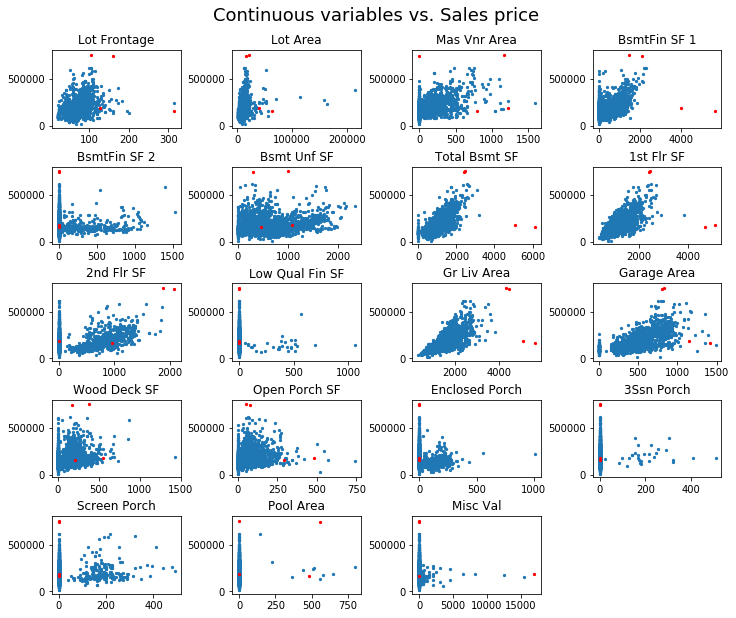

In [451]:
continuous_cols = list_by_kind('Continuous', exclusion_list=['SalePrice'])
plot_against(df_la_clean, continuous_cols, 'SalePrice', is_outlier, 'Continuous variables vs. Sales price')

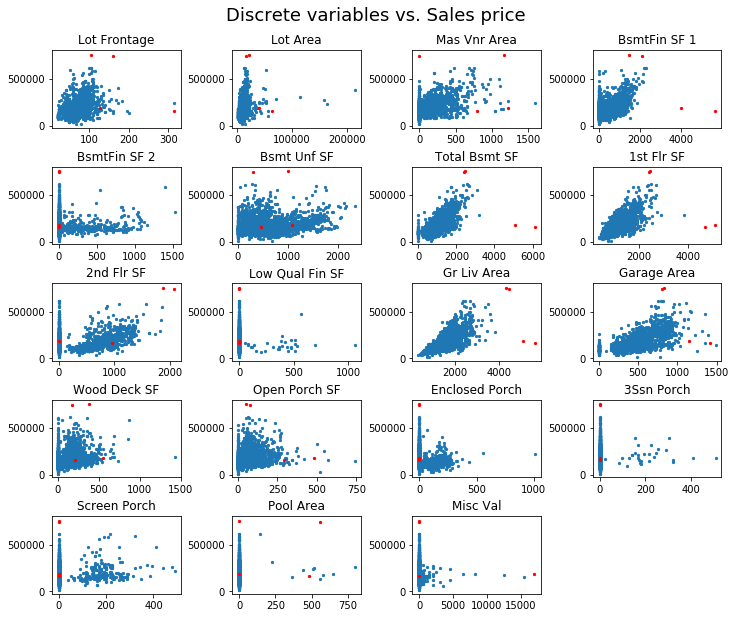

In [452]:
discrete_cols = list_by_kind('Discrete')
plot_against(df_la_clean, continuous_cols, 'SalePrice', is_outlier, 'Discrete variables vs. Sales price')

The result seems reasonnable.

In [453]:
# Remove outliers:
df_la_clean = df_la_clean[~is_outlier]

Due to time constraints, we put an end to step 3 here.

## Perform feature encoding<a name="stage-2"></a> ([top](#top))
---

In [454]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [455]:
nominal_cols = list_by_kind('Nominal')
ordinal_cols = list_by_kind('Ordinal')

We encode nominal variables using one-hot-encoding.

**Note:** In the version of Scikit included in the Conda environment for this course, the `OneHotEncoder` does not yet support `drop='first'`. That is why we do the one-hot encoding with Pandas. Note that even if the unlabeld data-set is missing some values for a given categorical variable, Pandas will still create the expected number of columns because of the `Categorical` data type.

In [456]:
def encode_nominal(df: pd.DataFrame, nominal_cols: T.Sequence[str]) -> pd.DataFrame:
    # Split:
    df_nom = df[nominal_cols]
    df_other = df.drop(columns=nominal_cols)
    
    # Encode nominal variables using one-hot encoding:
    df_nom_enc = pd.get_dummies(df_nom, drop_first=True)
    
    # Combine:
    return pd.concat([df_nom_enc, df_other], axis=1)

We encode ordinal variables using the `OrdinalEncoder` class from Scikit.

In [457]:
def make_ordinal_encoder(df: pd.DataFrame, names: T.Sequence[str]) -> OrdinalEncoder:
    categories = []
    for name in names:
        # Retrieve the CategoricalDType object:
        cat = df.dtypes[name]
        # Number values from the worst one to the best one in increasing order (cosmetic):
        cats = cat.categories  # best-to-worst
        cats = cats[::-1]      # worst-to-best 
        values = cats.to_list()
        categories.append(values)
    encoder = OrdinalEncoder(categories=categories)
    return encoder


def encode_ordinal(df: pd.DataFrame, ordinal_cols: T.Sequence[str]) -> pd.DataFrame:
    # Split:
    df_ord = df[ordinal_cols]
    df_other = df.drop(columns=ordinal_cols)
    
    # Encode ordinal variables:
    ordinal_encoder = make_ordinal_encoder(df_ord, ordinal_cols)
    preprocessor = ColumnTransformer([
        ('encode-ordinal', ordinal_encoder, ordinal_cols)
    ], remainder='passthrough')
    X_ord_enc = preprocessor.fit_transform(df_ord)
    df_ord_enc = pd.DataFrame(data=X_ord_enc, index=df_ord.index, columns=df_ord.columns)
        
    # Combine:
    return pd.concat([df_ord_enc, df_other], axis=1)

Here is the pre-processing function so far:

In [458]:
def preprocess_encode(df: pd.DataFrame,
                      nominal_cols: T.Sequence[str],
                      ordinal_cols: T.Sequence[str]) -> pd.DataFrame:
    # Work on a copy:
    df = df.copy()
    
    # Order matters for most steps below!
    
    # Encode nominal and ordinal variables:
    df = encode_nominal(df, nominal_cols)
    df = encode_ordinal(df, ordinal_cols)
            
    return df

In [459]:
print(df_la_clean.shape)
df_la_eng = preprocess_encode(df_la_clean, nominal_cols, ordinal_cols)
print(df_la_eng.shape)
with pd.option_context('display.max_columns', None):
    display(df_la_eng.head(3))

(2426, 80)
(2426, 228)


,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,MS SubClass_030,MS SubClass_040,MS SubClass_045,MS SubClass_050,MS SubClass_060,MS SubClass_070,MS SubClass_075,MS SubClass_080,MS SubClass_085,MS SubClass_090,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RP,MS Zoning_RM,Street_Pave,Alley_Pave,Alley_NA,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NoRidge,Neighborhood_NPkVill,Neighborhood_NridgHt,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_RRNn,Condition 1_RRAn,Condition 1_PosN,Condition 1_PosA,Condition 1_RRNe,Condition 1_RRAe,Condition 2_Feedr,Condition 2_Norm,Condition 2_RRNn,Condition 2_RRAn,Condition 2_PosN,Condition 2_PosA,Condition 2_RRNe,Condition 2_RRAe,Bldg Type_2FmCon,Bldg Type_Duplex,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Fin,House Style_1.5Unf,House Style_2Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Other,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CemntBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Mas Vnr Type_Unknown,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Misc Feature_NA,Sale Type_CWD,Sale Type_VWD,Sale Type_New,Sale Type_COD,Sale Type_Con,Sale Type_ConLw,Sale Type_ConLI,Sale Type_ConLD,Sale Type_Oth,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Partial,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,2.0,3.0,2.0,6.0,4.0,3.0,2.0,4.0,3.0,1.0,6.0,1.0,4.0,4.0,3.0,7.0,3.0,3.0,3.0,3.0,2.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,

## Perform feature engineering<a name="stage-3"></a> ([top](#top))
---

In [460]:
discrete_cols = list_by_kind('Discrete')
continuous_cols = list_by_kind('Continuous', exclusion_list=['SalePrice'])

### Sales price

Our target variable is `SalePrice`. As we have already seen during the course, the sales price is positively skewed and applying a log transformation allows to transform its distribution into one that is closer to the normal distribution.

### Continuous variables

As we have already seen during the course, applying a log transformation allows to transform the distribution of most continuous variables into one that is closer to the normal distribution. As we have also already seen during the course, adding polynomial features on top of the (transformed) continuous features helps with the prediction.

**Note:** Turning to the Internet, we found out that there are 2 related measures: [skewness](https://en.wikipedia.org/wiki/Skewness) and [kurtosis](https://en.wikipedia.org/wiki/Kurtosis) ("tailedness"), both available out-of-the-box in Pandas. We do not have any backround in statistics but, for comparison, the normal distribution has a skew of 0 and a kurtosis of 3.

In [461]:
def plot_distributions(df: pd.DataFrame, suptitle: str, ncols: int=4, exclusion_list=None):
    nrows = math.ceil(len(df.columns) / ncols)
    fig = plt.figure(figsize=(ncols * 3, nrows * 2))
    grid = plt.GridSpec(nrows, ncols, wspace=0.3, hspace=0.9)
    for i, name in enumerate(df.columns):
        row, col = i // ncols, i % ncols
        sub_ax = fig.add_subplot(grid[row, col])
        notna = df[name].dropna()
        if exclusion_list:
            notna = notna[~notna.isin(exclusion_list)]
        mean = notna.mean()
        median = notna.median()
        skew = notna.skew()
        kurt = notna.kurt()
        sub_ax.hist(notna, bins=30, ec='black')
        sub_ax.axvline(mean, color='red', linestyle='-', label='mean')
        sub_ax.axvline(median, color='lime', linestyle='-', label='median')
        title = '\n'.join([
            f'{name}',
            f'(mean={mean:.2f}, median={median:.2f},',
            f'skew={skew:.2f}, kurt={kurt:.2f})'
        ])
        sub_ax.set_title(title, fontsize=8)
    fig.suptitle(suptitle, fontsize=18, y = 0.96)
    plt.show()

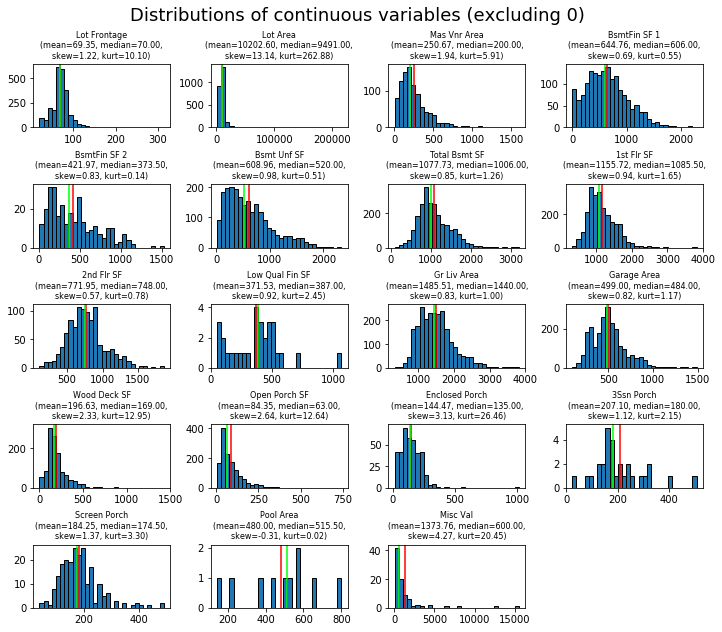

In [462]:
plot_distributions(df_la_clean[continuous_cols],
                   'Distributions of continuous variables (excluding 0)',
                   exclusion_list=[0])

In [463]:
df_test = np.log1p(df_la_clean[continuous_cols])

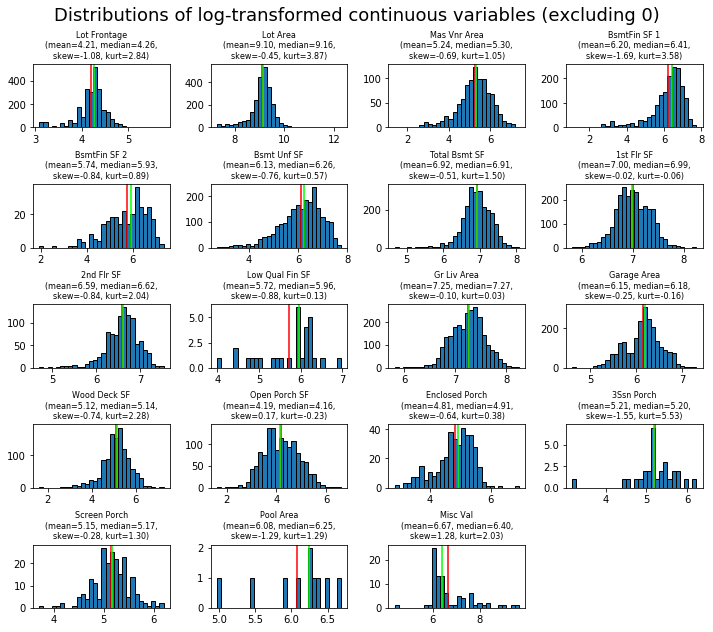

In [464]:
plot_distributions(df_test,
                   'Distributions of log-transformed continuous variables (excluding 0)',
                   exclusion_list=[0])

### Variables with a majority of NA values

We are a-priori concerned that qualitative variables with a majority of NA values could negatively affect the prediction.

In [465]:
ql_cols = nominal_cols + ordinal_cols
df_ql_na = (
    pd.DataFrame({
        'na_total': (df_la_clean[ql_cols] == 'NA').sum(),
        'na_perc' : (df_la_clean[ql_cols] == 'NA').sum() / len(df_la_clean) * 100
    })
    .sort_values(by='na_perc', ascending=False)
    .head(10)
)
df_ql_na

,na_total,na_perc
Pool QC,2416,99.587799
Misc Feature,2337,96.331410
Alley,2263,93.281121
Fence,1938,79.884584
Fireplace Qu,1186,48.887057
Garage Cond,137,5.647156
Garage Qual,137,5.647156
Garage Finish,137,5.647156
Garage Type,137,5.647156
Bsmt Qual,71,2.926628


**For the top 5, we decide to create simple indicators.** These indicators could, in a few cases, replace more than one variables. As far as the qualitative variable are concerned, these indicators "lump" non-NA values into a single, slightly larger, category.

In [466]:
def create_indicators(df: pd.DataFrame) -> pd.DataFrame:
    # An indicator that could replace 'Pool Area' and 'Pool QC':
    df['Has Pool'] = (df['Pool QC'] != 'NA').astype('float64')
    
    # An indicator that could replace 'Misc Feature' and 'Misc Val':
    df['Had Misc Feature'] = (df['Misc Feature'] != 'NA').astype('float64')
    
    # An indicator that could replace 'Alley':
    df['Has Alley'] = (df['Alley'] != 'NA').astype('float64')
    
    # An indicator that could replace 'Fence':
    df['Has Fence'] = (df['Fence'] != 'NA').astype('float64')
    
    # An indicator that could replace "Fireplaces" and "Fireplace Qu":
    df['Has Fireplace'] = (df['Fireplace Qu'] != 'NA').astype('float64')
    
    return df

Here is the final pre-processing function:

In [467]:
def preprocess(df: pd.DataFrame,
               nominal_cols: T.Sequence[str],
               ordinal_cols: T.Sequence[str],
               discrete_cols: T.Sequence[str],
               continuous_cols: T.Sequence[str],  # pass a dict?
               ) -> pd.DataFrame:
    # Work on a copy:
    df = df.copy()

    # Order matters for most steps below!
    
    # Create additional indicator variables:
    df = create_indicators(df)
    
    # Encode nominal and ordinal variables:
    df = encode_nominal(df, nominal_cols)
    df = encode_ordinal(df, ordinal_cols)
    
    # Transform continuous variables:
    df[continuous_cols] = np.log1p(df[continuous_cols])
    
    # Add polynomial features on top of the (transformed) continuous features:
    for col in continuous_cols:
        for deg in [0.5, 2, 3]:
            name = '{}**{}'.format(col, deg)
            df[name] = df[col]**deg
            
    return df

In [468]:
df_la_eng = preprocess(df_la_clean, nominal_cols, ordinal_cols, discrete_cols, continuous_cols)
print(df_la_eng.isna().sum().sum())
print(df_la_eng.shape)
with pd.option_context('display.max_columns', None):
    display(df_la_eng.head(3))

0
(2426, 290)


,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,MS SubClass_030,MS SubClass_040,MS SubClass_045,MS SubClass_050,MS SubClass_060,MS SubClass_070,MS SubClass_075,MS SubClass_080,MS SubClass_085,MS SubClass_090,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RP,MS Zoning_RM,Street_Pave,Alley_Pave,Alley_NA,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NoRidge,Neighborhood_NPkVill,Neighborhood_NridgHt,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_RRNn,Condition 1_RRAn,Condition 1_PosN,Condition 1_PosA,Condition 1_RRNe,Condition 1_RRAe,Condition 2_Feedr,Condition 2_Norm,Condition 2_RRNn,Condition 2_RRAn,Condition 2_PosN,Condition 2_PosA,Condition 2_RRNe,Condition 2_RRAe,Bldg Type_2FmCon,Bldg Type_Duplex,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Fin,House Style_1.5Unf,House Style_2Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Other,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CemntBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_WdShing,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Mas Vnr Type_Unknown,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Misc Feature_NA,Sale Type_CWD,Sale Type_VWD,Sale Type_New,Sale Type_COD,Sale Type_Con,Sale Type_ConLw,Sale Type_ConLI,Sale Type_ConLD,Sale Type_Oth,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Partial,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Has Pool,Had Misc Feature,Has Alley,Has Fence,Has Fireplace,Lot Frontage**0.5,Lot Frontage**2,Lot Frontage**3,Lot Area**0.5,Lot Area**2,Lot Area**3,Mas Vnr Area**0.5,Mas Vnr Area**2,Mas Vnr Area**3,BsmtFin SF 1**0.5,BsmtFin SF 1**2,Bs

## Perform model fitting<a name="stage-4"></a> ([top](#top))
---

We want to select the most promising 2 and 20 features for the simple and the moderate models.

### Selecting features based on correlation coefficients

We start by using the (Pearson) correlation coefficients.

In [558]:
def top_corr(df: pd.DataFrame, k: int) -> pd.Series:
    assert k > 0
    # Compute correlation coefficients:
    df_features = df.drop(columns='SalePrice')
    df_corr = (df_features
               .corrwith(df['SalePrice'])
               .to_frame(name='corr'))
    # Select the k largest in terms of absolute value:
    df_corr['abs_corr'] = df_corr['corr'].abs()
    df_corr_top_k = df_corr.nlargest(k, columns='abs_corr')
    return df_corr_top_k.drop(columns='abs_corr')


def plot_corr(df: pd.DataFrame) -> None:
    fig, ax = plt.subplots(figsize=(4, len(df) * 0.4))
    df_label = pd.DataFrame(data=[
        f'{label(coeff)} [{coeff:.2f}]' for coeff in df['corr']])
    sns.heatmap(df[['corr']], annot=df_label, fmt='', vmin=-1.0, vmax=1.0, cmap='coolwarm', ax=ax)
    plt.show()

We plot the top 2 correlation coefficients (after feature engineering):

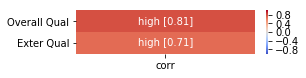

In [559]:
k = 2
df_top_2 = top_corr(df_la_eng, k)
plot_corr(df_top_2)

We plot the to 20 correlation coefficients (after feature engineering):

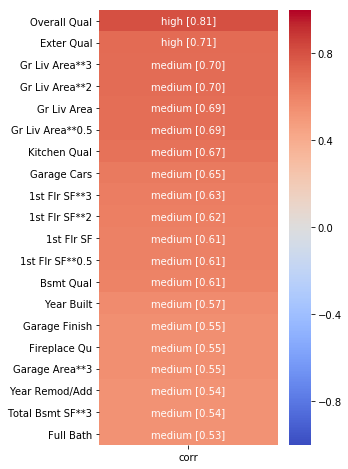

In [560]:
k = 20
df_top_20 = top_corr(df_la_eng, k)
plot_corr(df_top_20)

### Selecting features using Scikit-learn

In [523]:
from sklearn.feature_selection import SelectKBest

As suggested in the project description, we also try the `SelectKBest` object from Scikit-learn with the default score function. We are not familiar with the algorithm at all. After removing constant features we are left with one warning, that we decide to silence.

In [570]:
def top_corr_scikit(df: pd.DataFrame, k: int) -> pd.Series:
    assert k > 0
    df_X = df.drop(columns='SalePrice')
    se_y = df['SalePrice']
    # Find non-constant features:
    not_const_cols = df_X.columns[~(df_X == df_X.iloc[0]).all(axis=0)]
    df_X2 = df_X[not_const_cols]
    # Use SelectKBest object:
    selector = SelectKBest(k=k)
    with warnings.catch_warnings():
        # RuntimeWarning: divide by zero encountered in true_divide
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        selector.fit_transform(df_X2.to_numpy(), se_y.to_numpy())
    return df_X2.columns[selector.get_support()]


top_2_scikit = top_corr_scikit(df_la_eng, k=2).to_list()
pprint.pprint(top_2_scikit)

['Condition 2_PosN', 'Exterior 1st_ImStucc']


In [572]:
top_20_scikit = top_corr_scikit(df_la_eng, k=20).to_list()
pprint.pprint(top_20_scikit)

['Overall Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Kitchen Qual',
 'MS SubClass_150',
 'MS Zoning_C',
 'Street_Pave',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Condition 2_RRAn',
 'Condition 2_PosN',
 'Condition 2_PosA',
 'Exterior 1st_ImStucc',
 'Sale Type_New',
 'Sale Condition_Alloca',
 'Sale Condition_Partial',
 'Gr Liv Area',
 'Gr Liv Area**0.5',
 'Gr Liv Area**2',
 'Gr Liv Area**3']


In [ ]:
##
## CODE TO KEEP
##


def make_one_hot_encoder(df: pd.DataFrame, names: T.Sequence[str]) :
    # Avoid linearly dependent one-hot-encoded variables:
    # (We emulate "drop='first'", which is availabe in more recent versions of Scikit-learn.)
    categories = []
    for name in names:
        # Retrieve the CategoricalDType object:
        cat = df.dtypes[name]
        cat_values = cat.categories.to_list()
        cat_values = cat_values[1:]  # drop first
        categories.append(cat_values)
    encoder = OneHotEncoder(categories=categories, sparse=False, handle_unknown='ignore')
    return encoder


def get_original_feature_names(encoder: OneHotEncoder, names: T.Sequence[str]):
    assigned_names = encoder.get_feature_names()
    original_names = []
    for assigned_name in assigned_names:
        # Each name is of the form 'x<index>_<value>':
        xindex, value = assigned_name.split('_')
        index = int(xindex[1:])
        original_names.append(f'{names[index]}_{value}')
    return original_names


# ...
# encoder = preprocessor.named_transformers_['encode-nominal']
# # display(encoder.get_feature_names())
# nominal_names = [f'enc_{x}' for x in get_original_feature_names(encoder, nominal_cols)]